# Homework 2 - Aprendizagem

>Teresa Matos- ist1106009   
>Francisco Morão - ist1106067   
>Grupo 46  

## II. Programming

Consider the heart-disease.csv dataset available at the course webpage’s homework tab.
Using sklearn, apply a 5-fold stratified cross-validation with shuffling (random_state=0) for the
assessment of predictive models along this section.

1) Compare the performance of a 𝑘𝑁𝑁 with 𝑘 = 5 and a naïve Bayes with Gaussian
assumption (consider all remaining parameters as default):

a. [1.0v] Plot two boxplots with the fold accuracies for each classifier. Is there one
more stable than the other regarding performance? Why do you think that is the
case? Explain.


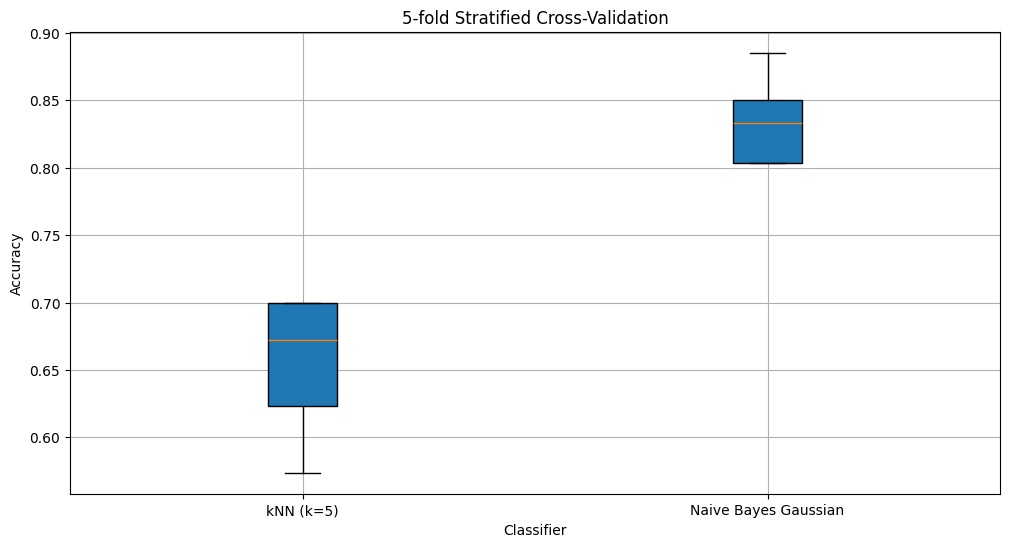

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

df = pd.read_csv('heart-disease.csv')

X = df.drop(columns='target')
y = df['target']

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

classifiers = [KNeighborsClassifier(n_neighbors=5), GaussianNB()]
classifier_names = ['kNN (k=5)', 'Naive Bayes Gaussian']

classifier_accuracies = []
for classifier in classifiers:
    accuracies = cross_val_score(classifier, X, y, cv=stratified_kfold)
    classifier_accuracies.append(accuracies)

plt.figure(figsize=(12, 6))
plt.boxplot(classifier_accuracies, patch_artist=True)
plt.xticks(np.arange(1, len(classifier_names) + 1), classifier_names)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('5-fold Stratified Cross-Validation')
plt.grid(True)
plt.show()

##### Explicaçao:
Sim, existe um classificador mais estável que o outro relativamente a sua performance. Neste caso o mais estável sera o Naive Bayes Gaussian. Isto porque a estabilidade do classificador pode ser dado por: Stability = 1 - (Biggest_value - Smallest_value), assim o classificador kNN tera uma estabilidade de aproximadamente de 0.87 (1 - 0.7 + 0.57) enquanto que o Naive Bayes tera 0.93 (1 - 0.88 - 0.81). Podemos assim concluir que o Naive Bayes tem uma maior estabilidade relativamente a performance.

Esta conclusão pode-se atribuir ao facto de o Naive Bayes Gaussian assumir uma distribuiçao normal, que apesar de conseguir lidar com todos os tipos de dados, consegue lidar bastante bem quando a independencia entre dados é violada (o que se verifica neste caso) e geralmente este classificador é geralmente menos sensível a ruído quando comparado a kNN. 

b. [1.0v] Report the accuracy of both models, this time scaling the data with a
Min-Max scaler before training the models. Explain the impact that this
preprocessing step has on the performance of each model, providing an
explanation for the results.

Scaled kNN Mean Accuracy: 0.8217
Scaled Naive Bayes Mean Accuracy: 0.8350


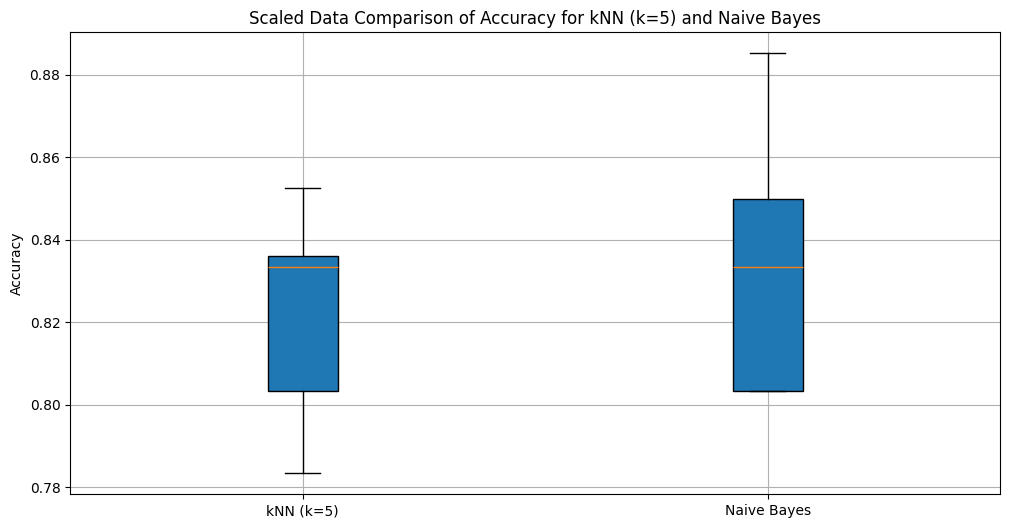

In [2]:
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('heart-disease.csv')

X = df.drop(columns='target')
y = df['target']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

knn = KNeighborsClassifier(n_neighbors=5)       # kNN
nb = GaussianNB()       # NB

knn_accuracies = cross_val_score(knn, X_scaled, y, cv=stratified_kfold)
nb_accuracies = cross_val_score(nb, X_scaled, y, cv=stratified_kfold)

knn_mean_accuracy = np.mean(knn_accuracies)
nb_mean_accuracy = np.mean(nb_accuracies)

print(f"Scaled kNN Mean Accuracy: {knn_mean_accuracy:.4f}")
print(f"Scaled Naive Bayes Mean Accuracy: {nb_mean_accuracy:.4f}")

plt.figure(figsize=(12, 6))
plt.boxplot([knn_accuracies, nb_accuracies], tick_labels=['kNN (k=5)', 'Naive Bayes'], patch_artist=True)
plt.title('Scaled Data Comparison of Accuracy for kNN (k=5) and Naive Bayes')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

#### Explicaçao:

kNN é um algoritmo que se baseia nas distâncias entre os dados, por isso ao fazermos um pré-processamento (MIN-MAX scaling) as variáveis são dimensionadas para a mesma escala, o que permite tornar o algoritmo mais equilibrado e mais exato e menos biased perante features que têm naturalmente uma variação maior. No entanto, isto não tem grande impacto num algoritmo como o Naive Bayes, que calcula probabilidades com base nas distribuições.

c. [1.0v] Using scipy, test the hypothesis “the 𝑘𝑁𝑁 model is statistically superior to
naïve Bayes regarding accuracy”, asserting whether it is true.


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from scipy.stats import ttest_rel

df = pd.read_csv('heart-disease.csv')

X = df.drop(columns='target')
y = df['target']

classifiers = [
    KNeighborsClassifier(n_neighbors=5),    # kNN
    GaussianNB()    # NB
]

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

kNN_accuracies = cross_val_score(classifiers[0], X, y, cv=stratified_kfold)
NB_accuracies = cross_val_score(classifiers[1], X, y, cv=stratified_kfold)

t_stat, p_value = ttest_rel(kNN_accuracies, NB_accuracies, alternative="greater")

print(f"kNN Mean Accuracy: {np.mean(kNN_accuracies):.4f}")
print(f"Naive Bayes Mean Accuracy: {np.mean(NB_accuracies):.4f}")
print(f"p-value: {p_value:.4f}")

#testing
alpha = 0.1
if p_value < alpha:
    print("kNN is statistically superior to Naive Bayes in terms of accuracy.")
else:
    print("kNN is not statistically superior to Naive Bayes.")


kNN Mean Accuracy: 0.6538
Naive Bayes Mean Accuracy: 0.8350
p-value: 0.9987
kNN is not statistically superior to Naive Bayes.


#### RESPOSTA:
Não podemos rejeitar a Hipótese nula para um nível de significância comum (0.1), e por isso não podemos dar a Hipótese dada como verdadeira.

2) Using a 80-20 train-test split, vary the number of neighbors of a 𝑘𝑁𝑁 classifier using
𝑘 = {1, 5, 10, 20, 30}. Additionally, for each 𝑘, train one classifier using uniform weights
and distance weights.


a. [1.0v] Plot the train and test accuracy for each model. 

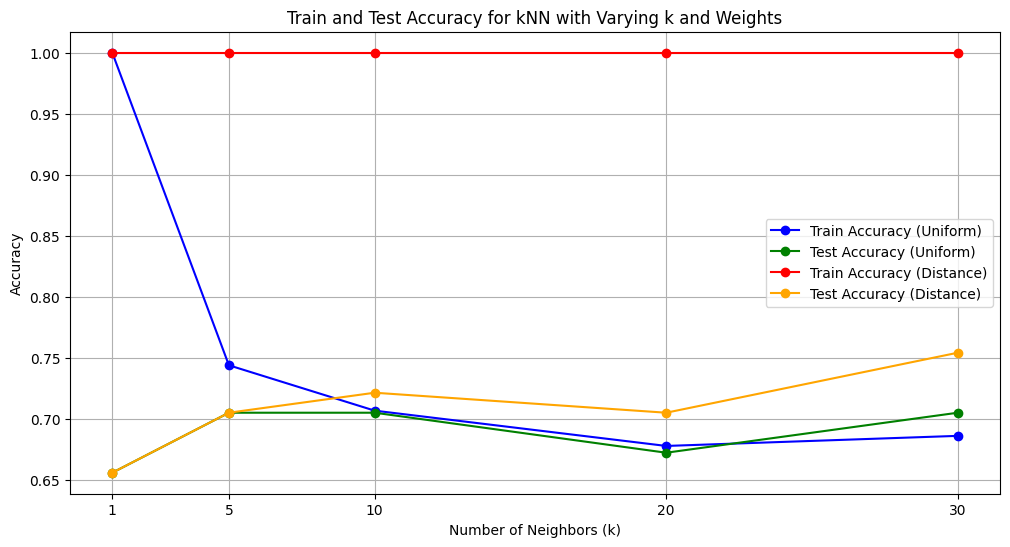

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

df = pd.read_csv('heart-disease.csv')

X = df.drop(columns='target')
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

k_values = [1, 5, 10, 20, 30]

train_accuracies_uniform = []
test_accuracies_uniform = []
train_accuracies_distance = []
test_accuracies_distance = []

for k in k_values:
    knn_uniform = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    knn_uniform.fit(X_train, y_train)
    
    knn_distance = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn_distance.fit(X_train, y_train)
    
    y_train_pred_uniform = knn_uniform.predict(X_train)
    y_test_pred_uniform = knn_uniform.predict(X_test)
    
    train_accuracies_uniform.append(accuracy_score(y_train, y_train_pred_uniform))
    test_accuracies_uniform.append(accuracy_score(y_test, y_test_pred_uniform))
    
    y_train_pred_distance = knn_distance.predict(X_train)
    y_test_pred_distance = knn_distance.predict(X_test)
    
    train_accuracies_distance.append(accuracy_score(y_train, y_train_pred_distance))
    test_accuracies_distance.append(accuracy_score(y_test, y_test_pred_distance))

plt.figure(figsize=(12, 6))

plt.plot(k_values, train_accuracies_uniform, label='Train Accuracy (Uniform)', marker='o', color='blue')
plt.plot(k_values, test_accuracies_uniform, label='Test Accuracy (Uniform)', marker='o', color='green')

plt.plot(k_values, train_accuracies_distance, label='Train Accuracy (Distance)', marker='o', color='red')
plt.plot(k_values, test_accuracies_distance, label='Test Accuracy (Distance)', marker='o', color='orange')

plt.title('Train and Test Accuracy for kNN with Varying k and Weights')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

b. [1.5v] Explain the impact of increasing the neighbors on the generalization ability of
the models.


O aumento de vizinhos vai provocar underfitting do modelo, ou seja, o modelo irá deixar de conseguir capturar corretamente a relação entre dados, devido ao excesso de ruído e complexidade, levando à uma má performance e a impossibilidade de generalização de dados.

3) [1.5v] Considering the unique properties of the heart-disease.csv dataset, identify two
possible difficulties of the naïve Bayes model used in the previous exercises when learning
from the given dataset.

Primeiramente, o modelo Naive Bayes assume que todas variáveis são independentes (inadequacy of independence assumption).Isto, na realidade, raramente acontece, e estas dependências estão presentes em parâmetros como a age e o cholesterol que podem estar relacionadas, visto que muitas vezes os níveis de cholesterol aumentam com a idade.
Esta assunção de independencia de variáveis vai levar a probabilidades incorretas e a um efeito negativo na performance do modelo.

Em seguida, o modelo Naive Bayes com Gaussian assume, também que as variáveis seguem uma distribuição normal (inadequacy of Gaussian assumption). No entanto, no ficheiro heart-disease.csv muitas das variáveis não seguem perfeitamente uma distribuição Gaussian. Variáveis como Age, cholesterol e resting blood pressure tem outliers e/ou são skewed. Esta assunção Gaussian pode se tornar problemática, reduzindo a eficácia do modelo.